In [1]:
import pandas as pd
import numpy as np

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [3]:
df = pd.read_csv("airfoil_self_noise.dat",sep='\t')

In [4]:
df.columns = ["Frequency", "Angle_of_attack","Chord_length","Free_stream","Disp_thickness","Presser_level"]
df.head()

,Frequency,Angle_of_attack,Chord_length,Free_stream,Disp_thickness,Presser_level
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [18]:
df.isnull().sum()

Frequency          0
Angle_of_attack    0
Chord_length       0
Free_stream        0
Disp_thickness     0
Presser_level      0
dtype: int64

In [24]:
df.skew()

Frequency          2.136180
Angle_of_attack    0.688553
Chord_length       0.458497
Free_stream        0.237297
Disp_thickness    -0.008708
Presser_level     -0.418439
dtype: float64

In [23]:
df["Disp_thickness"] = np.log(df.Disp_thickness)

In [22]:
df.skew()

Frequency          2.136180
Angle_of_attack    0.688553
Chord_length       0.458497
Free_stream        0.237297
Disp_thickness     1.701196
Presser_level     -0.418439
dtype: float64

In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.shape, X_test.shape

((1201, 5), (301, 5))

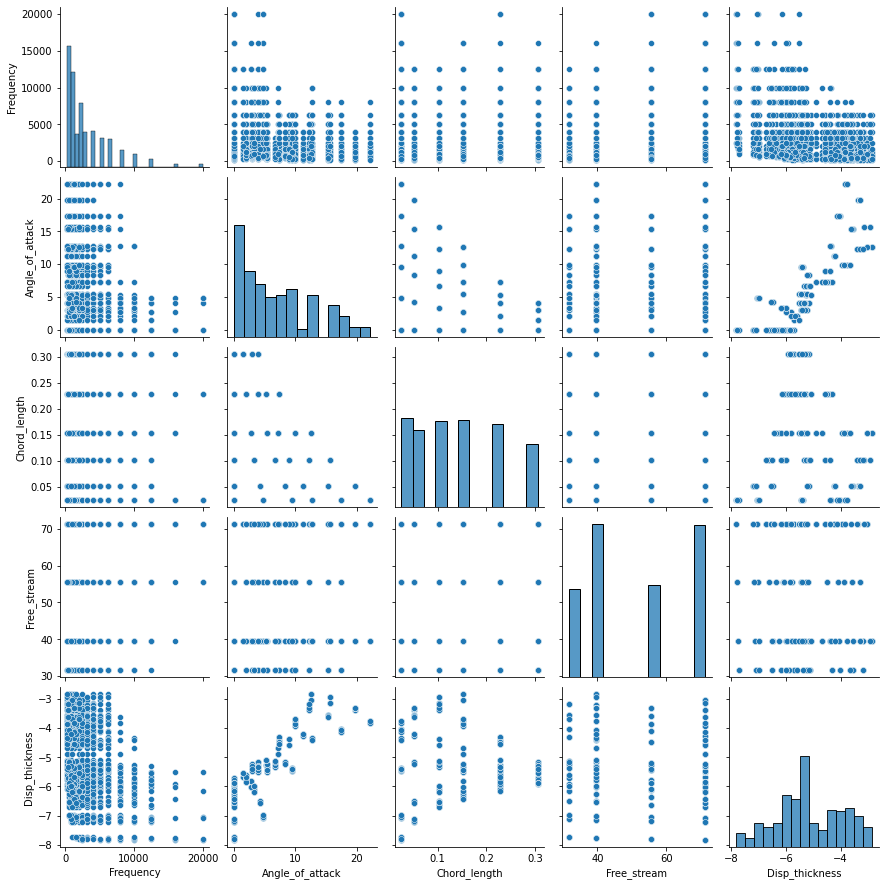

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(X_train)

<AxesSubplot:>

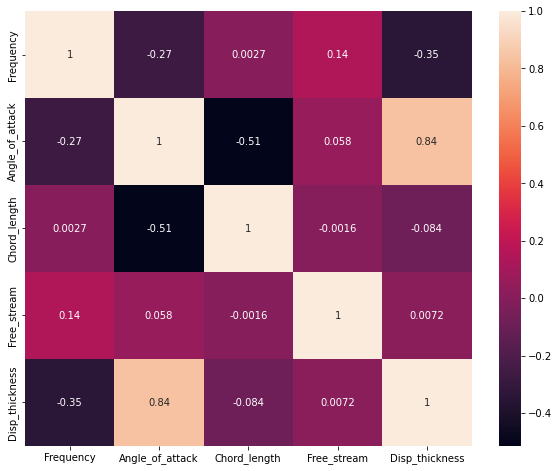

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(),annot=True)

In [30]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [31]:
X_train = st.fit_transform(X_train)

In [32]:
X_test  = st.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.metrics import r2_score

In [38]:
lr = LinearRegression()
lasso = Lasso()
ridg = Ridge()
rf = RandomForestRegressor()
svr = SVR()
dt = DecisionTreeRegressor()

In [42]:
models = {"Linear":lr,"Lasso":lasso,"Ridge":ridg,"Random_Forest":rf,"SVR":svr,"Decision_Tree":dt}

In [46]:
for name,model in models.items():
    model.fit(X_train,y_train)
    acc = r2_score(y_test,model.predict(X_test))
    print("accuracy Score for ",name," : ",acc)

accuracy Score for  Linear  :  0.5512161895637445
accuracy Score for  Lasso  :  0.4092844616492354
accuracy Score for  Ridge  :  0.551216110189863
accuracy Score for  Random_Forest  :  0.9551272844481595
accuracy Score for  SVR  :  0.7586429749206274
accuracy Score for  Decision_Tree  :  0.912150160686629


In [47]:
import pickle

In [48]:
pickle.dump(rf, open("Random_model.pkl","wb"))

In [50]:
pickle.load(open("Random_model.pkl","rb")).predict(X_test)

array([131.44899, 114.05798, 130.30333, 125.32652, 111.93767, 114.50933,
       122.56321, 131.20388, 134.77054, 127.85893, 126.7726 , 119.71825,
       121.52186, 134.22799, 124.75103, 132.81744, 117.44392, 130.4728 ,
       114.81705, 126.03858, 117.77814, 128.74194, 121.36426, 122.48825,
       125.6127 , 116.42594, 109.32256, 130.96085, 126.96601, 132.43062,
       134.6002 , 129.89608, 112.44007, 128.78554, 128.64024, 119.87821,
       130.87249, 125.86919, 111.99642, 110.73484, 127.18514, 129.43351,
       108.39008, 124.4857 , 130.30624, 119.77581, 129.70198, 116.8112 ,
       133.66826, 130.05534, 132.65791, 132.07825, 123.96416, 119.35238,
       132.03886, 127.85708, 120.46367, 126.79228, 128.03514, 126.68974,
       125.06226, 123.87726, 129.30011, 126.26583, 132.19812, 124.34499,
       114.50212, 125.07419, 130.02881, 118.49862, 122.89386, 113.87721,
       127.71248, 129.03119, 107.38851, 122.28659, 119.67938, 114.24151,
       126.30277, 114.15845, 111.59364, 118.61871, 